In [41]:
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns

sns.set() # set sns as default style
# fig.suptitle('Total Area (um^2) of RAM Cell Types; RL optimized')
# fig, ax = plt.subplots()

global df_nvs_2d
global df_dst_2d
global df_dst_hd

df_nvs_2d = pd.read_csv("NVSim_report.csv")
df_dst_2d = pd.read_csv("Destiny_report.csv")
df_dst_hd = pd.read_csv("HD_Destiny_report.csv")

# print(df.loc[252], df.loc[287]) # print row 253 and 288


# set type to any plot type in the seaborn reference: https://seaborn.pydata.org/api.html
def graph(plot_type, xax, yax, df):
    ax = getattr(sns, plot_type)(x=xax, y=yax, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.rcParams["xtick.labelsize"] = 7
    plt.xlabel(xax); plt.ylabel(yax)
    plt.title(xax + " vs " + yax)
    plt.tight_layout(); plt.show()

# set type to any plot type in the seaborn reference: https://seaborn.pydata.org/api.html
def graph_build_only(plot_type, xax, yax, df):
    ax = getattr(sns, plot_type)(x=xax, y=yax, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.rcParams["xtick.labelsize"] = 7
    plt.xlabel(xax); plt.ylabel(yax)
    plt.title(xax + " vs " + yax)
    plt.tight_layout()


# def plot_2x2_boxplot(dataframe, xaxis, yaxis0, yaxis1, yaxis2, yaxis3, title): # awesome
#     fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20, 20))
#     fig.suptitle(f'{title}')

#     sns.boxplot(ax=axes[0, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis0}')
#     sns.boxplot(ax=axes[0, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis1}')
#     sns.boxplot(ax=axes[1, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis2}')
#     sns.boxplot(ax=axes[1, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis3}')


# expects 36 row dataframe
def plot_2x2_boxplot(dataframe, xaxis, yaxis0, yaxis1, yaxis2, yaxis3, title, cell_type=None): # awesome
    if cell_type == 'STTRAM':
        dataframe = dataframe.loc[0:8]
    elif cell_type == 'SRAM':
        dataframe = dataframe.loc[9:17]
    elif cell_type == 'RRAM':
        dataframe = dataframe.loc[18:26]
    elif cell_type == 'PCRAM':
        dataframe = dataframe.loc[27:35]
    
    if cell_type is not None:
        title = f'{cell_type}: {title}'
    
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 10))
    fig.suptitle(f'{title}')

    sns.boxplot(ax=axes[0, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis0}')
    sns.boxplot(ax=axes[0, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis1}')
    sns.boxplot(ax=axes[1, 0], data=dataframe, x=f'{xaxis}', y=f'{yaxis2}')
    sns.boxplot(ax=axes[1, 1], data=dataframe, x=f'{xaxis}', y=f'{yaxis3}')    


def main():

    df_RL_TA = df_dst_2d.head(36) # top 36 rows [0:35]

    # graph(plot_type, x_axis, y_axis, df_dst_2d)
    graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_dst_2d)
    graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_RL_TA)


    RL_TA = df_dst_2d['Total Area (um^2)'][0:36]
    # print(RL_TA)

    RL_TA_STTRAM = df_RL_TA[0:9]
    RL_TA_SRAM   = df_RL_TA[9:18]
    RL_TA_RRAM   = df_RL_TA[18:27]
    RL_TA_PCRAM  = df_RL_TA[27:36]

    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", RL_TA_STTRAM)
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", RL_TA_SRAM)
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_RL_TA)
    # graph("boxplot", "Capacity (KB)", "Total Area (um^2)", df_RL_TA)


    for cell in [ RL_TA_STTRAM, RL_TA_SRAM, RL_TA_RRAM, RL_TA_PCRAM ]:
        graph("boxplot", "Capacity (KB)", "Total Area (um^2)", cell)

    # set graph axes here
    for cell in [ RL_TA_STTRAM, RL_TA_SRAM, RL_TA_RRAM, RL_TA_PCRAM ]:
        # want to call a loop of all cell types before calling plt.show()
        graph_build_only("boxplot", "Capacity (KB)", "Total Area (um^2)", cell)

        # set a marker for each cell type in the legend etc

    # show the plot after building it through the diff cell types
    plt.show()

    all_cells = [ RL_TA_STTRAM.values, RL_TA_SRAM.values, RL_TA_RRAM.values, RL_TA_PCRAM.values ]

    
if __name__ == "__main__":
    # main()
    pass


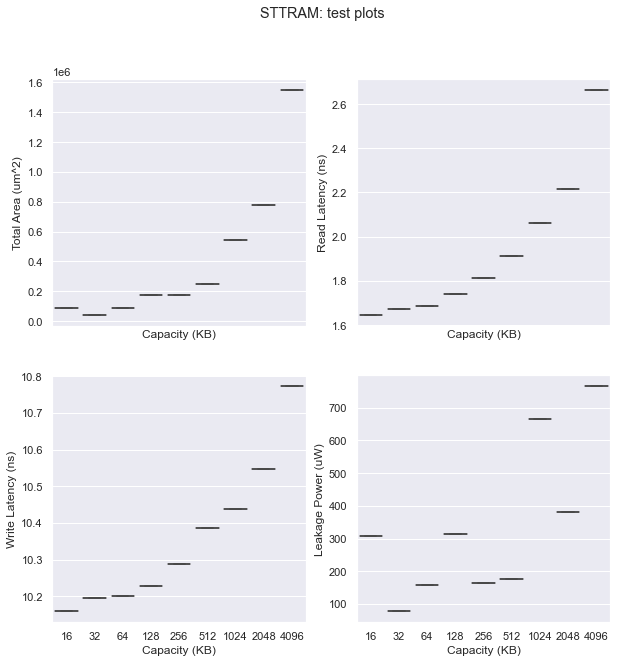

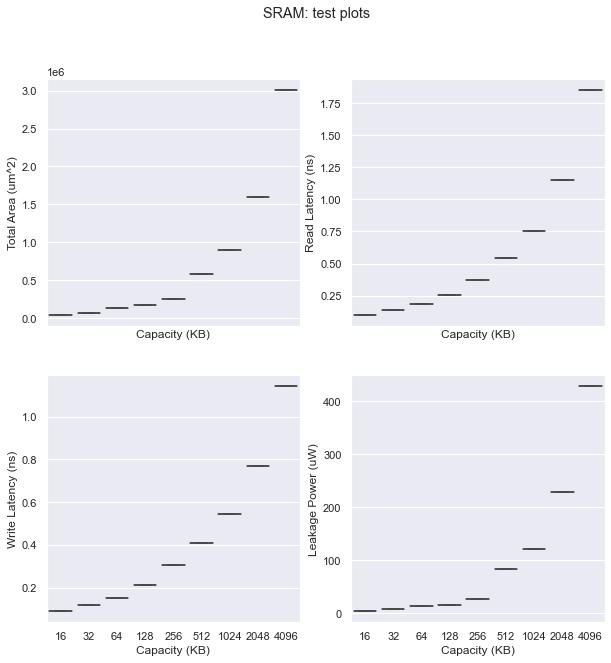

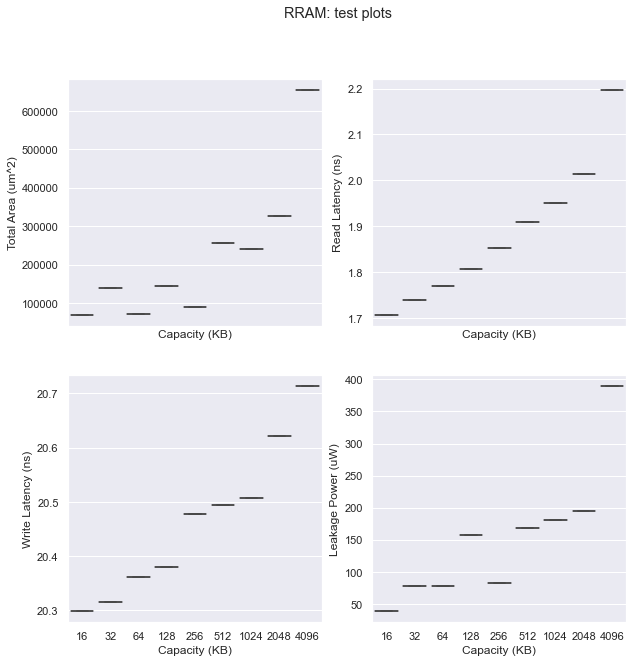

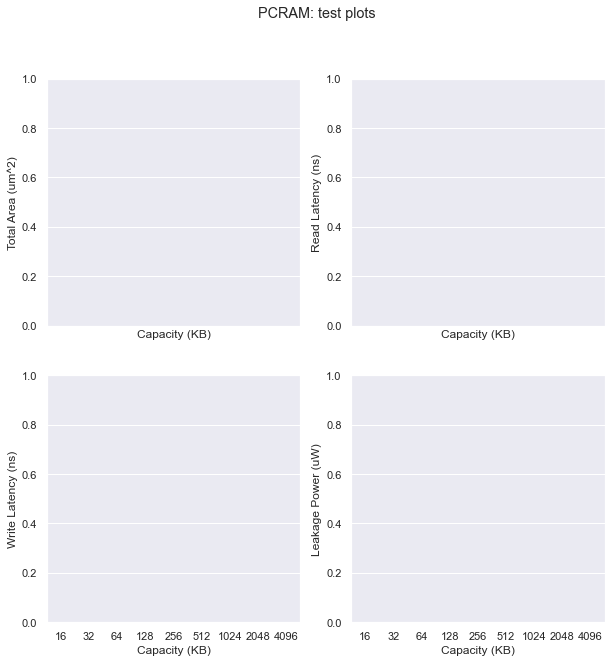

In [42]:
# NVSIM 2D

# nvsim 2D with 8 optimizations
# n*[0:8] =   STTRAM
# n*[9:17] =  SRAM
# n*[18:26] = RRAM
# n*[27:35] = PCRAM
df_nvs_opt_r_lat = df_nvs_2d.loc[0:35]
df_nvs_opt_w_lat = df_nvs_2d.loc[36:71]
df_nvs_opt_rde =   df_nvs_2d.loc[72:107]
df_nvs_opt_wde =   df_nvs_2d.loc[108:143]
df_nvs_opt_r_edp = df_nvs_2d.loc[144:179]
df_nvs_opt_w_edp = df_nvs_2d.loc[180:215]
df_nvs_opt_l_pow = df_nvs_2d.loc[216:251]
df_nvs_opt_area =  df_nvs_2d.loc[252:287]

plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'STTRAM')
plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'SRAM')
plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'RRAM')
plot_2x2_boxplot(df_nvs_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'PCRAM')


"\nsns.boxplot(ax=axes[0, 0], data=df_ar_opt, x='Capacity (KB)', y='Total Area (um^2)')\nsns.boxplot(ax=axes[0, 1], data=df_ar_opt, x='Capacity (KB)', y='Read Latency (ns)')\nsns.boxplot(ax=axes[1, 0], data=df_ar_opt, x='Capacity (KB)', y='Write Latency (ns)')\nsns.boxplot(ax=axes[1, 1], data=df_ar_opt, x='Capacity (KB)', y='Leakage Power (uW)')\n"

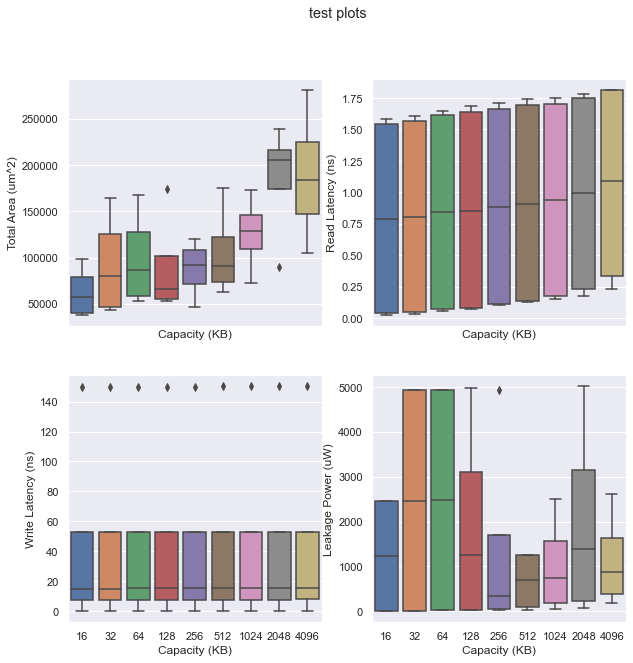

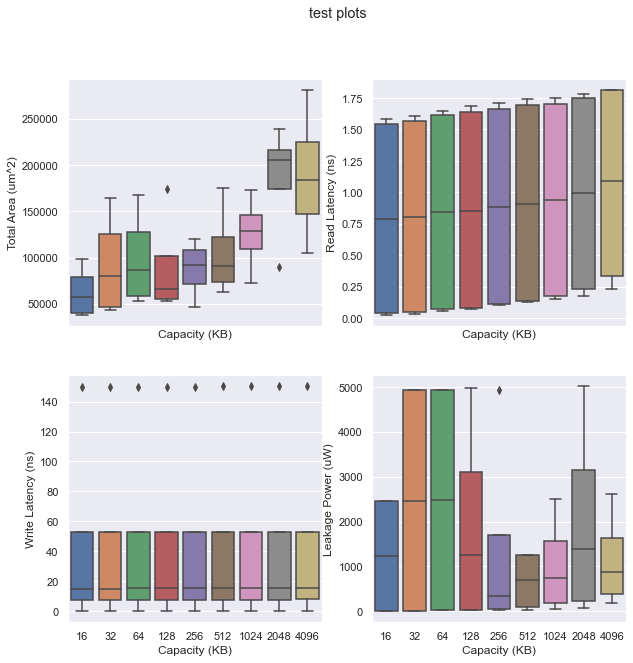

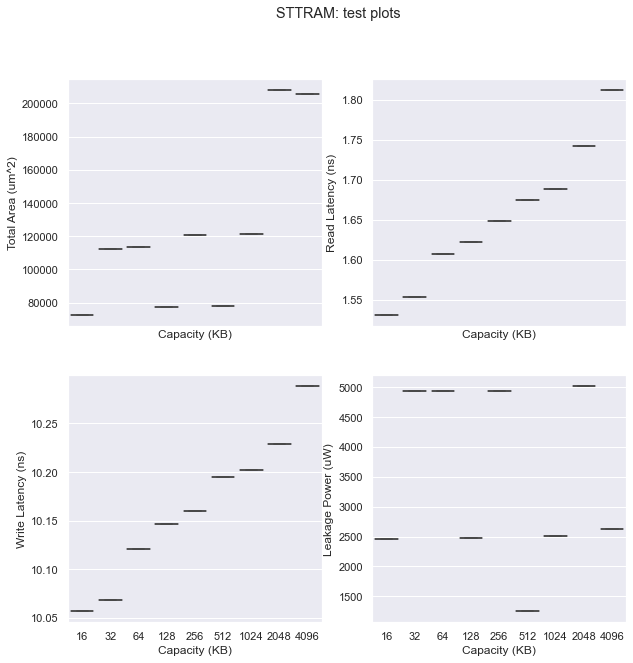

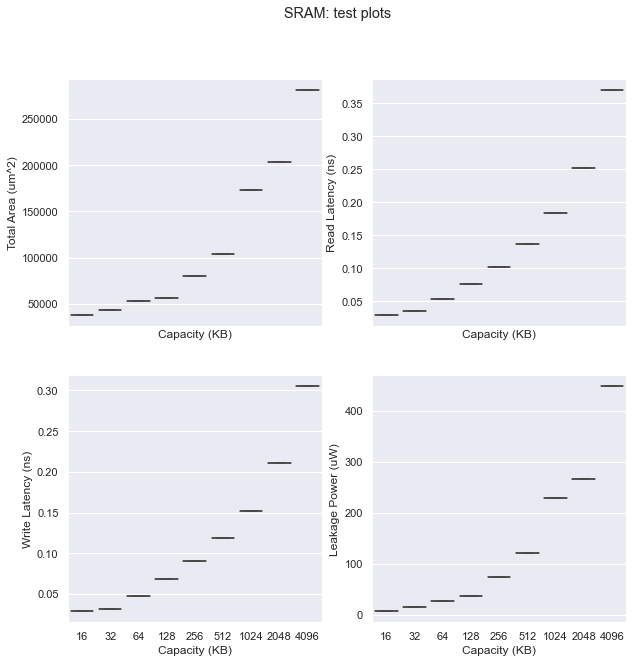

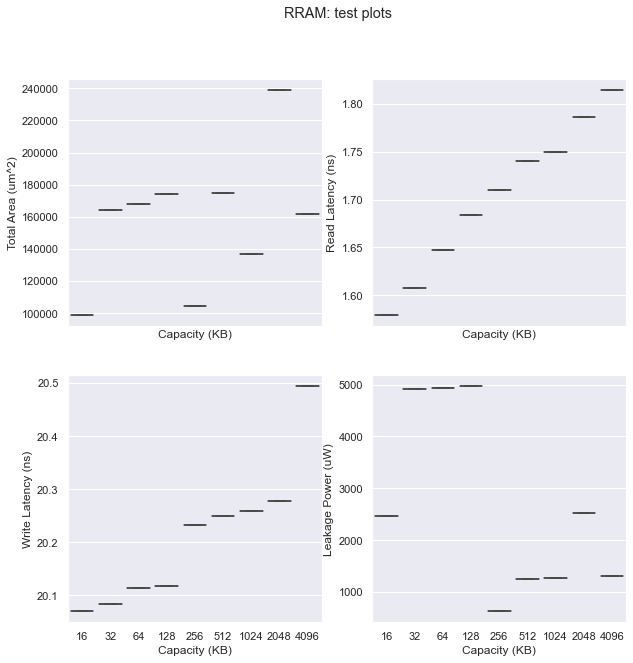

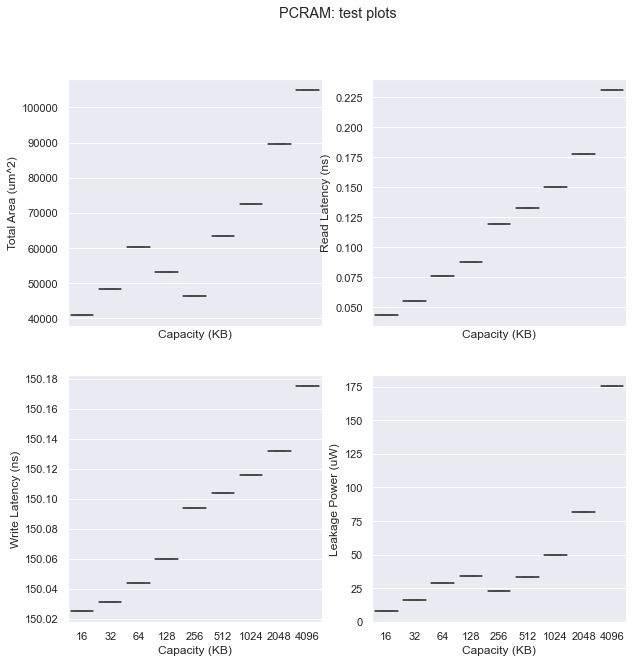

In [43]:
# DESTINY 2D

# destiny 2D with 8 optimizations
# n*[0:8] =   STTRAM
# n*[9:17] =  SRAM
# n*[18:26] = RRAM
# n*[27:35] = PCRAM
df_dst_opt_r_lat = df_dst_2d.loc[0:35]
df_dst_opt_w_lat = df_dst_2d.loc[36:71]
df_dst_opt_rde =   df_dst_2d.loc[72:107]
df_dst_opt_wde =   df_dst_2d.loc[108:143]
df_dst_opt_r_edp = df_dst_2d.loc[144:179]
df_dst_opt_w_edp = df_dst_2d.loc[180:215]
df_dst_opt_l_pow = df_dst_2d.loc[216:251]
df_dst_opt_area =  df_dst_2d.loc[252:287]


plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots')

plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots')



plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'STTRAM')
plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'SRAM')
plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'RRAM')
plot_2x2_boxplot(df_dst_opt_r_lat, 'Capacity (KB)', 'Total Area (um^2)', 'Read Latency (ns)', 'Write Latency (ns)', 'Leakage Power (uW)', 'test plots', 'PCRAM')


"""
sns.boxplot(ax=axes[0, 0], data=df_ar_opt, x='Capacity (KB)', y='Total Area (um^2)')
sns.boxplot(ax=axes[0, 1], data=df_ar_opt, x='Capacity (KB)', y='Read Latency (ns)')
sns.boxplot(ax=axes[1, 0], data=df_ar_opt, x='Capacity (KB)', y='Write Latency (ns)')
sns.boxplot(ax=axes[1, 1], data=df_ar_opt, x='Capacity (KB)', y='Leakage Power (uW)')
"""

# sns.boxplot(ax=axes[0, 0], data=df, x='Capacity (KB)', y='Total Area (um^2)')
# sns.boxplot(ax=axes[0, 1], data=df, x='Capacity (KB)', y='Read Latency (ns)')
# sns.boxplot(ax=axes[1, 0], data=df, x='Capacity (KB)', y='Write Latency (ns)')
# sns.boxplot(ax=axes[1, 1], data=df, x='Capacity (KB)', y='Leakage Power (uW)')


In [ ]:
# DESTINY HD

# destiny High Density with 8 optimizations
# [0:71] =   3D_RRAM
# [72:143] = MLC_RRAM

df_dst_opt_r_lat =    df_dst_hd.loc[0:35]
df_dst_opt_w_lat =   df_dst_hd.loc[36:71]
df_dst_opt_rde =    df_dst_hd.loc[72:107]
df_dst_opt_wde =   df_dst_hd.loc[108:143]


In [ ]:
def paper_advice():
    pass
    # ----------------------------------------
    # Paper Guidance - Prof Donato


    # strategy - generate all plots then pick and choose

    # compare nvsim and destiny like the labs
        # highlight if there are major differences

    # then go into 3d and mlc
        # go deeper into analysis here

        # R/W BW - understand why it doesn't generate MLC values


    # paper - brief into on tools 
    # what do they do and what are they designed for

    # implementation

    # discuss results

    # tool issues

    # conclusion

    # ----------------------------------------